# Data 분석 priview (Baby names )

In [1]:
#옵션사항 넣기
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [2]:
names = pd.read_csv('./data/births_names.csv',sep = ',', header=0, names= ['id','name','year','gender','births'])





In [3]:
names.head(3)





,id,name,year,gender,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003


In [4]:
# data set size
names.shape





(1825388, 5)

In [5]:
# 년도별, 성별 그룹후 총 출생횟수를 계산하고 시각화하기
# pivot table을 사용하여 그룹화하기
total_births = names.pivot_table('births',index = 'year', columns = 'gender', aggfunc = sum)
total_births.head()





gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113683
1883,112321,104629
1884,129022,114445


<IPython.core.display.Javascript object>


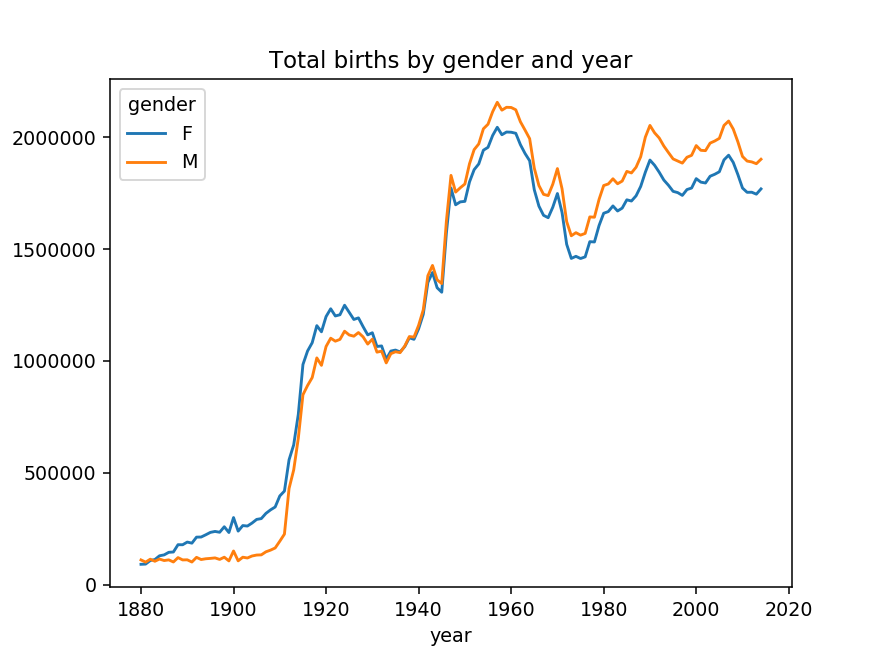

In [6]:
ax = total_births.plot()





In [7]:
ax.set_title('Total births by gender and year')





Text(0.5, 1.0, 'Total births by gender and year')

In [8]:
# 각 (연도,성별) 그룹내에서 각 이름의 출생횟수가 전체에서 차지하는
# 비중을 나타내는 열 추가하기 - 키값을 주기 위해서 딕셔너리 변환
grouped_names_dict = dict(list(names.groupby(['year','gender'])))





In [9]:
grouped_names_dict.keys()





dict_keys([(1880, 'F'), (1880, 'M'), (1881, 'F'), (1881, 'M'), (1882, 'F'), (1882, 'M'), (1883, 'F'), (1883, 'M'), (1884, 'F'), (1884, 'M'), (1885, 'F'), (1885, 'M'), (1886, 'F'), (1886, 'M'), (1887, 'F'), (1887, 'M'), (1888, 'F'), (1888, 'M'), (1889, 'F'), (1889, 'M'), (1890, 'F'), (1890, 'M'), (1891, 'F'), (1891, 'M'), (1892, 'F'), (1892, 'M'), (1893, 'F'), (1893, 'M'), (1894, 'F'), (1894, 'M'), (1895, 'F'), (1895, 'M'), (1896, 'F'), (1896, 'M'), (1897, 'F'), (1897, 'M'), (1898, 'F'), (1898, 'M'), (1899, 'F'), (1899, 'M'), (1900, 'F'), (1900, 'M'), (1901, 'F'), (1901, 'M'), (1902, 'F'), (1902, 'M'), (1903, 'F'), (1903, 'M'), (1904, 'F'), (1904, 'M'), (1905, 'F'), (1905, 'M'), (1906, 'F'), (1906, 'M'), (1907, 'F'), (1907, 'M'), (1908, 'F'), (1908, 'M'), (1909, 'F'), (1909, 'M'), (1910, 'F'), (1910, 'M'), (1911, 'F'), (1911, 'M'), (1912, 'F'), (1912, 'M'), (1913, 'F'), (1913, 'M'), (1914, 'F'), (1914, 'M'), (1915, 'F'), (1915, 'M'), (1916, 'F'), (1916, 'M'), (1917, 'F'), (1917, 'M'), (

In [10]:
# 키 값으로 가져오기
grouped_names_dict[2014,'M'].head()





,id,name,year,gender,births
1811411,1,Noah,2014,M,19144
1811412,2,Liam,2014,M,18342
1811413,3,Mason,2014,M,17092
1811414,4,Jacob,2014,M,16712
1811415,5,William,2014,M,16687


In [11]:
def add_prop(agg_df):
    agg_births = agg_df['births']
    agg_df['prop'] = agg_births/ agg_births.sum()
    return agg_df





In [12]:
names_with_prop = names.groupby(['year','gender']).apply(add_prop)





In [13]:
names_with_prop.head()





,id,name,year,gender,births,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188


In [14]:
names['births'].head()





0    7065
1    2604
2    2003
3    1939
4    1746
Name: births, dtype: int64

In [15]:
# 각 연도, 성별 그룹내 출생 횟수 기준으로 Top1000 이름 추출하기





In [16]:
grouped_names_with_prop_dict = dict(list(names_with_prop.groupby(['year','gender'])))





In [17]:
# 샘플 가지고 적용해 본 다음 전체로 적용하는 습관 가지기
grouped_sample = grouped_names_with_prop_dict[(2011,'M')]





In [18]:
# ascending False해서 큰데이터 부터
grouped_sample.sort_values(by='births', ascending=False).iloc[:10]





,id,name,year,gender,births,prop
1711128,1,Jacob,2011,M,20331,0.010739
1711129,2,Mason,2011,M,19488,0.010294
1711130,3,William,2011,M,17314,0.009145
1711131,4,Jayden,2011,M,16954,0.008955
1711132,5,Noah,2011,M,16838,0.008894
1711133,6,Michael,2011,M,16744,0.008844
1711134,7,Ethan,2011,M,16665,0.008802
1711135,8,Alexander,2011,M,15681,0.008283
1711136,9,Aiden,2011,M,15469,0.008171
1711137,10,Daniel,2011,M,15249,0.008054


In [19]:
# 전체로 적용
def get_top1000(agg_df):
    top100_df = agg_df.sort_values(by='births',ascending=False).iloc[:1000]
    return top100_df





In [20]:
top1000_names = names_with_prop.groupby(['year','gender']).apply(get_top1000)





In [21]:
top1000_names





id       name  year gender  births      prop
year gender                                                        
1880 F      0           1       Mary  1880      F    7065  0.077643
            1           2       Anna  1880      F    2604  0.028618
            2           3       Emma  1880      F    2003  0.022013
            3           4  Elizabeth  1880      F    1939  0.021309
            4           5     Minnie  1880      F    1746  0.019188
            5           6   Margaret  1880      F    1578  0.017342
            6           7        Ida  1880      F    1472  0.016177
            7           8      Alice  1880      F    1414  0.015540
            8           9     Bertha  1880      F    1320  0.014507
            9          10      Sarah  1880      F    1288  0.014155
            10         11      Annie  1880      F    1258  0.013825
            11         12      Clara  1880      F    1226  0.013474
            12         13       Ella  1880      F    1156  0.012704
            13         14   Florence  1880      F    1063  0.011682
            14         15       Cora  1880      F    1045  0.011484
            15         16     Martha  1880      F    1040  0.011429
            16         17      Laura  1880      F    1012  0.011122
            17         18     Nellie  1880      F     995  0.010935
            18         19      Grace  1880      F     982  0.010792
            19         20     Carrie  1880      F     949  0.010429
            20         21      Maude  1880      F     858  0.009429
            21         22      Mabel  1880      F     808  0.008880
            22         23     Bessie  1880      F     796  0.008748
            23         24     Jennie  1880      F     793  0.008715
            24         25   Gertrude  1880      F     787  0.008649
            25         26      Julia  1880      F     783  0.008605
            26         27     Hattie  1880      F     769  0.008451
            27         28      Edith  1880      F     768  0.008440
            28         29     Mattie  1880      F     704  0.007737
            29         30       Rose  1880      F     700  0.007693
...                   ...        ...   ...    ...     ...       ...
2014 M      1812381   971      Dario  2014      M     214  0.000113
            1812382   972       Kale  2014      M     214  0.000113
            1812383   973  Broderick  2014      M     213  0.000112
            1812384   974    Jayvion  2014      M     213  0.000112
            1812385   975     Kaison  2014      M     213  0.000112
            1812386   976       Koen  2014      M     213  0.000112
            1812387   977     Magnus  2014      M     213  0.000112
            1812390   980   Valentin  2014      M     212  0.000111
            1812389   979     Teagan  2014      M     212  0.000111
            1812388   978     Darien  2014      M     212  0.000111
            1812391   981      Bodie  2014      M     211  0.000111
            1812392   982    Brayson  2014      M     211  0.000111
            1812393   983      Chace  2014      M     211  0.000111
            1812394   984      Kylen  2014      M     209  0.000110
            1812395   985     Yehuda  2014      M     209  0.000110
            1812396   986    Bridger  2014      M     208  0.000109
            1812397   987     Howard  2014      M     208  0.000109
            1812398   988     Maddux  2014      M     208  0.000109
            1812399   989    Osvaldo  2014      M     208  0.000109
            1812400   990      Rocky  2014      M     208  0.000109
            1812404   994       Jair  2014      M     207  0.000109
            1812406   996      Tyree  2014      M     207  0.000109
            1812405   995    Reyansh  2014      M     207  0.000109
            1812403   993     Foster  2014      M     207  0.000109
            1812402   992      Boden  2014      M     207  0.000109
            1812401   991       Ayan  2014      M     207  0.000109
           

In [22]:
# 2011년 성별이 M인 이름의 크기
names_with_prop.loc[(names_with_prop['year']==2011)&(names_with_prop['gender']=='M')].shape





(14329, 6)

In [23]:
top1000_names.loc[(2011,'M')].shape





(1000, 6)

In [24]:
# 각 연도에 따른 전체 출생횟수 대비 top 1000 이름들의 출생횟수 비중 산출하기 - 1000개의 이름이 전체에서 몇퍼센트야?





In [25]:
top1000_names.head()





id       name  year gender  births      prop
year gender                                                
1880 F      0   1       Mary  1880      F    7065  0.077643
            1   2       Anna  1880      F    2604  0.028618
            2   3       Emma  1880      F    2003  0.022013
            3   4  Elizabeth  1880      F    1939  0.021309
            4   5     Minnie  1880      F    1746  0.019188

In [26]:
# top1000 의 prop를 더함으로 top1000의 전체 이름 대비 비중을 구한다
top1000_prop = top1000_names.pivot_table("prop",index='year',columns='gender',aggfunc=sum)
top1000_prop





C:\Users\GSCHOI\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)
C:\Users\GSCHOI\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'gender' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


gender,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995690
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


<IPython.core.display.Javascript object>


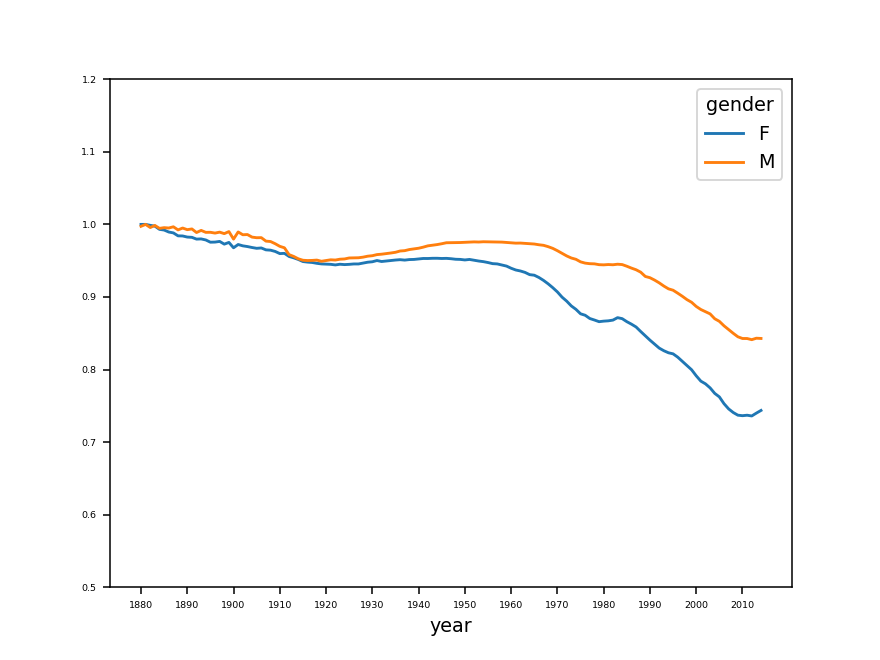

In [27]:
ax = top1000_prop.plot(fontsize=5)





In [28]:
# x축 데이터 10씩 늘려
ax.set_xticks(range(1880,2020,10))





In [29]:
ax.set_yticks(np.arange(0.5,1.3,0.1))





In [30]:
# 특정 이름들의 연도에 따른 출생횟수 변화 추이 분석하기
top1000_names.head()





id       name  year gender  births      prop
year gender                                                
1880 F      0   1       Mary  1880      F    7065  0.077643
            1   2       Anna  1880      F    2604  0.028618
            2   3       Emma  1880      F    2003  0.022013
            3   4  Elizabeth  1880      F    1939  0.021309
            4   5     Minnie  1880      F    1746  0.019188

In [31]:
top1000_names_births = top1000_names.pivot_table('births',index='year',columns='name',aggfunc=sum)





C:\Users\GSCHOI\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


In [36]:
top1000_names_births.head()





name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [43]:
top1000_names_births_subset=top1000_names_births[['John','Harry','Mary','Marilyn','Jason']]





In [44]:
top1000_names_births_subset.head()





name,John,Harry,Mary,Marilyn,Jason
year,,,,,
1880,9701.0,2158.0,7092.0,NaN,20.0
1881,8795.0,2002.0,6948.0,NaN,22.0
1882,9597.0,2246.0,8178.0,NaN,20.0
1883,8934.0,2116.0,8044.0,NaN,13.0
1884,9428.0,2338.0,9253.0,NaN,25.0


<IPython.core.display.Javascript object>


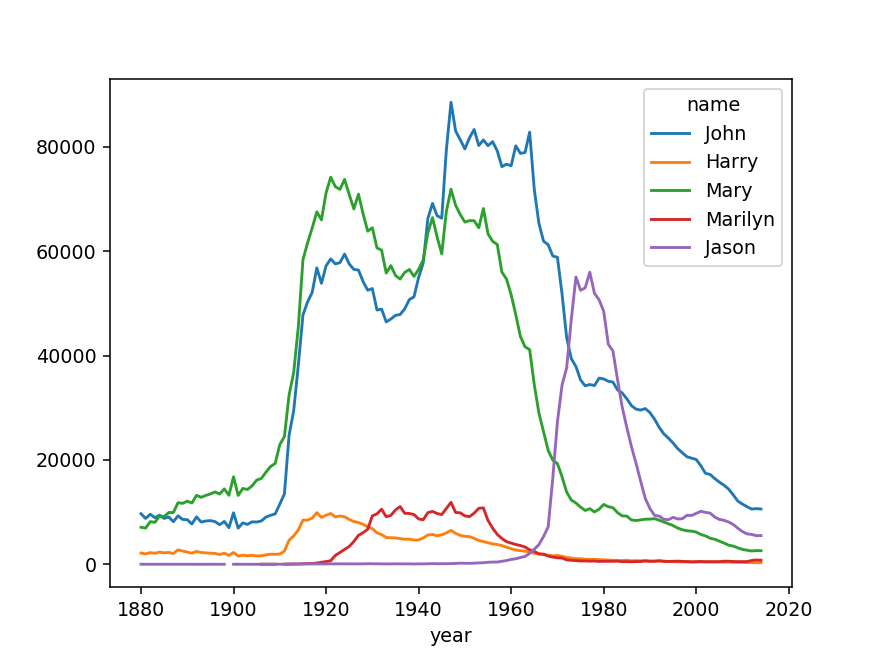

In [45]:
top1000_names_births_subset.plot()





<IPython.core.display.Javascript object>


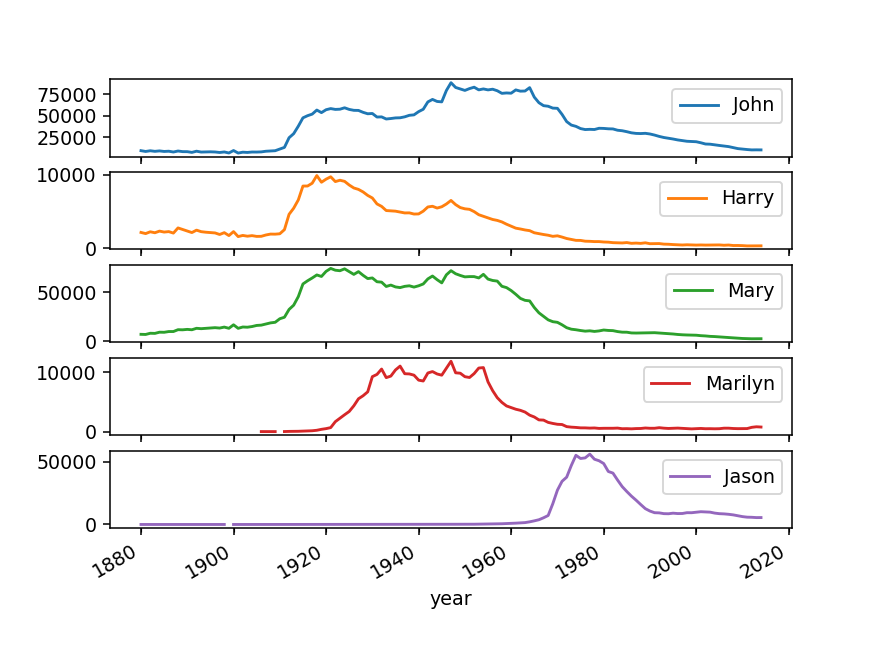

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022437C33B38>,
      dtype=object)

In [46]:
# 각이름별 변화추이 보기 
top1000_names_births_subset.plot(subplots=True)





In [47]:
# 남아 이름의 마지막 글자가 연도에 따라 어떻게 변화 하였는지 분석





In [ ]:
# 맨 마지막 글자를 추출하는 함수 작성





In [51]:
get_last_letter = lambda x:x[-1]





In [52]:
# apply 앞의 names['name']이 lamda에 들어가는 x이다. 행이 많이 있을 경우 알아서 for문 역할이 돌아가서 한칼럼씩 적용됨
names['last_letter'] = names['name'].apply(get_last_letter)





In [73]:
names.head()





,id,name,year,gender,births,last_letter
0,1,Mary,1880,F,7065,y
1,2,Anna,1880,F,2604,a
2,3,Emma,1880,F,2003,a
3,4,Elizabeth,1880,F,1939,h
4,5,Minnie,1880,F,1746,e


In [76]:
get_letter_table = names.pivot_table('births',index='last_letter',columns=['gender','year'],aggfunc=sum)





In [77]:
get_letter_table





gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
E                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41913.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5567.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2151.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10468.0  10404.0  12144.0  12063.0  13918.0  13927.0  14933.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                                    ...            M            \
year            1887     1888     1889    ...         2005      2006   
last_letter                               ...                          
E                NaN      NaN      NaN    ...         26.0      19.0   
a            48942.0  59441.0  58632.0    ...      36877.0   36210.0   
b                NaN      NaN      NaN    ...      43178.0   42645.0   
c                NaN      NaN      NaN    ...      26102.0   26661.0   
d             1027.0   1298.0   1374.0    ...      50730.0   51474.0   
e            54353.0  66750.0  66661.0    ...     141211.0  143107.0   
f                NaN      NaN      NaN    ...       1988.0    1970.0   
g               25.0     44.0     28.0    ...       1884.0    1931.0   
h             7141.0   8630.0   8825.0    ...      92582.0   98635.0   
i              105.0    141.0    134.0    ...      31356.0   33595.0   
j                NaN      NaN      NaN    ...       1293.0    1243.0   
k               19.0     21.0     22.0    ...      42183.0   42575.0   
l             6174.0   7900.0   8395.0    ...     155442.0  156433.0   
m               90.0    123.0    137.0    ...      41637.0   42568.0   
n             5512.0   6832.0   7103.0    ...     686815.0  721724.0   
o               97.0    134.0    142.0    ...      92054.0   96405.0   
p                NaN      NaN      NaN    ...       2769.0    2724.0   
q                NaN      NaN      NaN    ...        446.0     431.0   
r              910.0   1207.0   1214.0    ...     172184.0  176654.0   
s             2803.0   3582.0   3569.0    ...     140031.0  143356.0   
t  

In [78]:
# 칼럼이 너무 많아 내가 원하는 것만 찾아보자 - 지우기 보단 새로 만들어서 써보자.
three_year_subtable = get_letter_table.reindex(columns=[1910,1960,2010],level='year')





In [79]:
three_year_subtable





gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
E                 NaN       NaN      29.0      NaN       NaN      41.0
a            108397.0  691245.0  675901.0    977.0    5214.0   28814.0
b                 NaN     694.0     454.0    411.0    3912.0   39208.0
c                 5.0      49.0     953.0    482.0   15466.0   23307.0
d              6751.0    3728.0    2635.0  22113.0  262143.0   44758.0
e            133601.0  435048.0  316259.0  28665.0  178810.0  130032.0
f                 NaN      20.0      97.0    152.0    9230.0    2309.0
g                57.0     318.0     667.0    439.0   20234.0    2693.0
h             20431.0   73248.0  134586.0   8850.0   80851.0   99125.0
i               605.0   80814.0   56203.0    164.0    1291.0   43377.0
j                 NaN       NaN     164.0      NaN       NaN    1475.0
k                48.0     315.0     630.0   7104.0  105304.0   35480.0
l             17124.0   68485.0   46776.0  12629.0  223709.0  134811.0
m               476.0   17418.0    4605.0  11273.0   72141.0   47302.0
n             31417.0  264252.0  248332.0  27849.0  325306.0  693690.0
o               663.0    4934.0    2209.0   3314.0   27371.0   81522.0
p                 7.0      47.0      35.0    616.0   12101.0    2428.0
q                 NaN       NaN      53.0      NaN       NaN     344.0
r              5310.0   13680.0   31993.0  12522.0   66202.0  167287.0
s             15479.0   25813.0   23649.0  25404.0  219102.0  124710.0
t             10877.0   30736.0   13910.0  14155.0  140039.0   43759.0
u               271.0    1160.0     739.0     24.0     121.0    2353.0
v                 NaN     122.0     208.0     22.0      78.0    2776.0
w                 8.0      63.0    2109.0   1228.0   16442.0   30948.0
x                 6.0      74.0    1294.0    770.0    3947.0   16454.0
y             44002.0  308496.0  207006.0  15022.0  343311.0  111354.0
z               966.0    1334.0    1242.0     33.0     392.0    3494.0

In [80]:
# 모든 함수는 밑으로 움직여
three_year_subtable.sum()





gender  year
F       1910     396501.0
        1960    2022093.0
        2010    1772738.0
M       1910     194218.0
        1960    2132717.0
        2010    1913851.0
dtype: float64

In [83]:
three_year_subtable.T.sum()





last_letter
E         70.0
a    1510548.0
b      44679.0
c      40262.0
d     342128.0
e    1222415.0
f      11808.0
g      24408.0
h     417091.0
i     182454.0
j       1639.0
k     148881.0
l     503534.0
m     153215.0
n    1590846.0
o     120013.0
p      15234.0
q        397.0
r     296994.0
s     434157.0
t     253476.0
u       4668.0
v       3206.0
w      50798.0
x      22545.0
y    1029191.0
z       7461.0
dtype: float64

In [85]:
# 각 문자의 전체에서의 비중을 만들어서 그래프 그리기
three_year_subtable_prop = three_year_subtable/three_year_subtable.sum()





In [87]:
three_year_subtable_prop.head()





gender              F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
E                 NaN       NaN  0.000016       NaN       NaN  0.000021
a            0.273384  0.341846  0.381275  0.005030  0.002445  0.015056
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020486
c            0.000013  0.000024  0.000538  0.002482  0.007252  0.012178
d            0.017026  0.001844  0.001486  0.113857  0.122915  0.023386

<IPython.core.display.Javascript object>


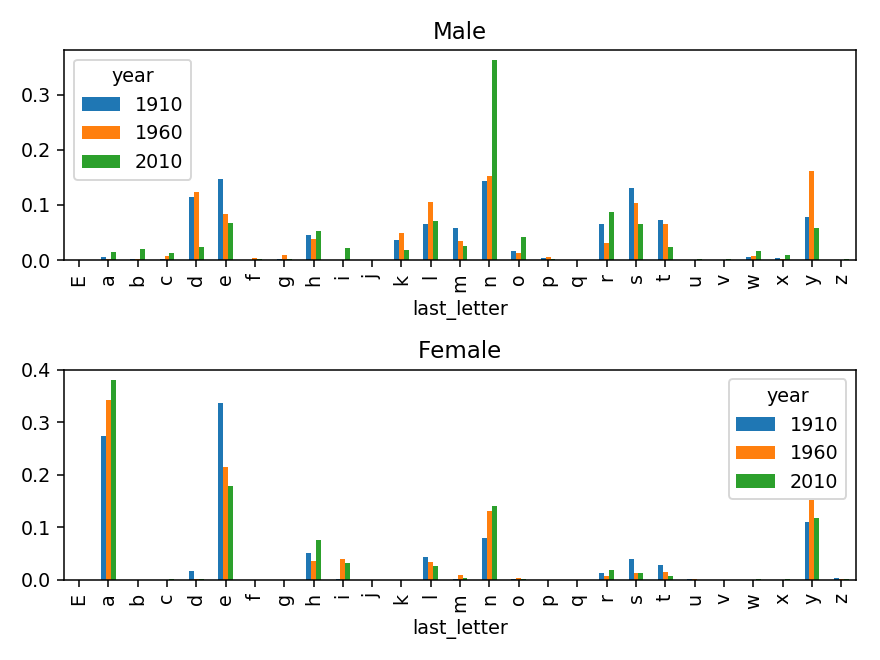

In [89]:
fig,axes = plt.subplots(2,1)





In [91]:
three_year_subtable_prop['M'].plot(kind='bar',ax=axes[0],title='Male')#바로 그리고, 위에 있는곳에 그리고,제목은 Male





In [93]:
three_year_subtable_prop['F'].plot(kind='bar',ax=axes[1],title='Female')





In [94]:
plt.tight_layout()



